In [39]:
pip install -r requiements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)

In [2]:
# Charger le dataset
df = pd.read_csv("Students_LifeStyle2.csv")

# Afficher échantillon de 10 lignes au hasard
print("Échantillon :")
df.sample(10)

Échantillon :


,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
3421,4422,23.0,Female,Engineering,2.57,7.8,6.6,2.2,129.0,3,False
2260,3261,23.0,Female,Science,3.21,6.3,6.4,2.2,50.0,3,False
4883,5884,18.0,Female,Medical,3.61,8.7,2.4,2.8,47.0,3,False
443,1444,23.0,Male,Medical,2.23,8.9,2.8,3.2,42.0,3,False
893,1894,24.0,Female,Business,2.22,5.4,10.2,3.0,72.0,5,False
4840,5841,24.0,Female,Science,3.77,5.9,4.9,2.4,30.0,3,False
2376,3377,19.0,Male,Engineering,3.58,4.3,5.8,3.5,41.0,8,False
1059,2060,20.0,Male,Science,3.79,8.5,5.0,2.1,143.0,4,False
2600,3601,22.0,Male,Business,3.78,6.3,8.5,4.2,130.0,2,False
4053,5054,22.0,Male,Engineering,2.15,7.2,5.0,3.2,36.0,3,False


In [3]:
print(df.shape, "\n")
print(df.info(), "\n")
print("Valeurs manquantes :")
print(df.isnull().sum().sum(), "\n")
print("Valeurs uniques par colonne :")
df.nunique()

(5019, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          5019 non-null   int64  
 1   Age                 5011 non-null   float64
 2   Gender              5019 non-null   object 
 3   Department          5019 non-null   object 
 4   CGPA                5019 non-null   float64
 5   Sleep_Duration      4981 non-null   float64
 6   Study_Hours         5018 non-null   float64
 7   Social_Media_Hours  5000 non-null   float64
 8   Physical_Activity   4998 non-null   float64
 9   Stress_Level        5019 non-null   int64  
 10  Depression          5019 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 397.1+ KB
None 

Valeurs manquantes :
87 

Valeurs uniques par colonne :


Student_ID            5019
Age                      7
Gender                   2
Department               5
CGPA                   225
Sleep_Duration          89
Study_Hours            115
Social_Media_Hours      85
Physical_Activity      150
Stress_Level             9
Depression               2
dtype: int64

Dans notre Dataset il y 5019 lignes que représente les étudiants et a 11 colonnes dont leurs informations.

Dans notre dataset il y a 7 variables numériques (Student_ID, Age, CGPA, Sleep_Duration, Study_Hours, Social_Media_Hours et Physical_Activity) et 4 catégorielles(Gender, Department, Stress_Level et Depression). 

Entre les variables catégorielles il y a 2 variables bynaires (Gender et Depression), 1 variable ordinale (Stress_Level) et 1 variable Nominal (Department). 

Il y a aussi une variable à supprimer "Student_ID" car elle a une valeur unique par ligne et en plus elle sert d'identifiant donc on peut la supprimer.

On remarque qu'il y a quelques valeurs null dans notre dataset (87), notament dans les colonnes "Age", "Sleep_Duration", "Study_Hours", "Physical_Activity" et "Social_Media_Hours". 

In [4]:
print(df.describe())
print(df.describe(include="bool"))
df.describe(include="object")



        Student_ID          Age         CGPA  Sleep_Duration  Study_Hours  \
count  5019.000000  5011.000000  5019.000000     4981.000000  5018.000000   
mean   3510.000000    21.016763     2.907268        6.990705     4.545197   
std    1449.004831     2.023938     0.536304        1.506523     1.991728   
min    1001.000000    18.000000     1.730000        3.000000     0.000000   
25%    2255.500000    19.000000     2.450000        6.000000     3.200000   
50%    3510.000000    21.000000     2.920000        7.000000     4.500000   
75%    4764.500000    23.000000     3.360000        8.000000     5.900000   
max    6019.000000    24.000000     4.000000       12.000000    11.900000   

       Social_Media_Hours  Physical_Activity  Stress_Level  
count          5000.00000        4998.000000   5019.000000  
mean              3.53012          74.438776      4.159195  
std               1.49395          43.194078      1.433375  
min               0.00000           0.000000      2.000000  
2

,Gender,Department
count,5019,5019
unique,2,5
top,Female,Business
freq,2590,1027


On peut dire que la variable "Depression" est très déséquilibrée. que 4494 de 5019 étudiants sont déprimiés.

"CGPA" : La moyenne est de 2.91 avec un maximum à 4.0 de plus la moyenne est très proche de la médiane (2.92), la distribution semble très symétrique.
"Study_Hours" : en moyenne 4,5h par jour. Cependant, certains travaillent 0h (le minimum) et d'autres jusqu'à 11,9h. C'est une grande variabilité.
"Physical Activity" : La moyenne est de 74 minutes mais La distribution est très large (std de 43), ce qui signifie que les habitudes sportives sont très différentes.

In [5]:
#nombre de lignes dupliquées
df.duplicated().sum()


np.int64(0)

Pas de doublons



On cherche les valeurs aberrantes

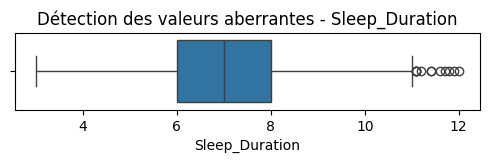

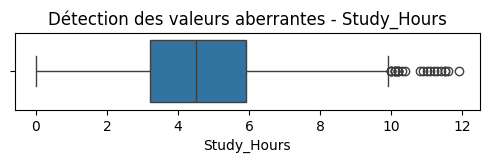

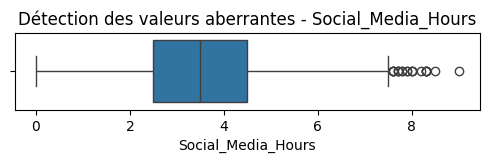

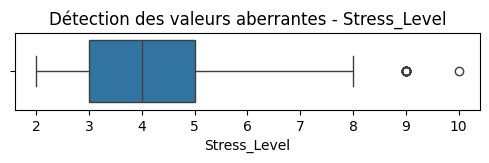

In [6]:
#visualisation valeurs aberrantes
plt.figure(figsize=(6,1))
sns.boxplot(x=df["Sleep_Duration"])
plt.title("Détection des valeurs aberrantes - Sleep_Duration")
plt.show()

plt.figure(figsize=(6,1))
sns.boxplot(x=df["Study_Hours"])
plt.title("Détection des valeurs aberrantes - Study_Hours")
plt.show()

plt.figure(figsize=(6,1))
sns.boxplot(x=df["Social_Media_Hours"])
plt.title("Détection des valeurs aberrantes - Social_Media_Hours")
plt.show()

plt.figure(figsize=(6,1))
sns.boxplot(x=df["Stress_Level"])
plt.title("Détection des valeurs aberrantes - Stress_Level")
plt.show()

On a trouvé des valeurs aberrantes pour les variables "Sleep_Duration", "Study_Hours", "Social_Media_Hours" et "Stress_Level"


Début du nettoyage

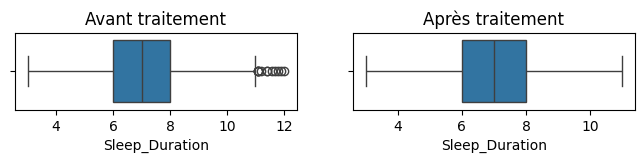

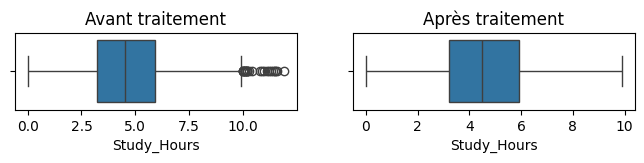

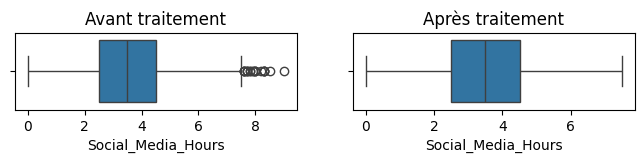

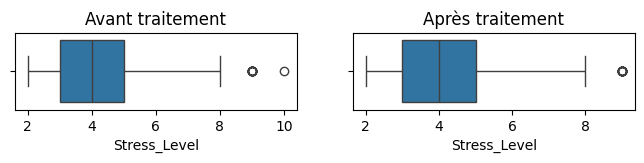

In [7]:
# Remettre la donnée sur le bon typage

# Variables binaires
binary_cols = [
    "Gender", "Depression"
]
df[binary_cols] = df[binary_cols].astype("category")

# Variables catégprielles
cat_cols = [
    "Department"
]
df[cat_cols] = df[cat_cols].astype("category")

# Variables ordinales
ordinal_cols = [
    "Stress_Level"
]
df[ordinal_cols] = df[ordinal_cols].astype("category")


num_cols = [
    "Age", "CGPA", "Sleep_Duration", "Study_Hours", "Social_Media_Hours",
    "Physical_Activity"
]

# Suppresions des variables inutiles
df.drop(columns=["Student_ID"], inplace=True)

# Suppresion valeurs aberrantes
df_clean = df.copy()

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    df_clean = df_clean[
        (df_clean[col] >= Q1 - 1.5 * IQR) &
        (df_clean[col] <= Q3 + 1.5 * IQR)
    ]

# Visualisation

plt.figure(figsize=(8,1))

plt.subplot(1,2,1)
sns.boxplot(x=df["Sleep_Duration"])
plt.title("Avant traitement")

plt.subplot(1,2,2)
sns.boxplot(x=df_clean["Sleep_Duration"])
plt.title("Après traitement")

plt.show()

plt.figure(figsize=(8,1))

plt.subplot(1,2,1)
sns.boxplot(x=df["Study_Hours"])
plt.title("Avant traitement")

plt.subplot(1,2,2)
sns.boxplot(x=df_clean["Study_Hours"])
plt.title("Après traitement")

plt.show()


plt.figure(figsize=(8,1))

plt.subplot(1,2,1)
sns.boxplot(x=df["Social_Media_Hours"])
plt.title("Avant traitement")

plt.subplot(1,2,2)
sns.boxplot(x=df_clean["Social_Media_Hours"])
plt.title("Après traitement")

plt.show()

plt.figure(figsize=(8,1))

plt.subplot(1,2,1)
sns.boxplot(x=df["Stress_Level"])
plt.title("Avant traitement")

plt.subplot(1,2,2)
sns.boxplot(x=df_clean["Stress_Level"])
plt.title("Après traitement")

plt.show()

In [8]:
# Remplacement des valeurs manquantes

# Age : remplace par moyenne
df_clean["Age"] = df_clean["Age"].fillna(df_clean["Age"].mean())

# Sleep_Duration : remplace par moyenne
df_clean["Sleep_Duration"] = df_clean["Sleep_Duration"].fillna(df_clean["Sleep_Duration"].mean())

# Study_Hours : remplace par mediane
df_clean["Study_Hours"] = df_clean["Study_Hours"].fillna(df_clean["Study_Hours"].median())

# Social_Media_Hours : remplace par moyenne car plûtot symétrique
df_clean["Social_Media_Hours"] = df_clean["Social_Media_Hours"].fillna(df_clean["Social_Media_Hours"].median())

# Physical_Activity : remplace par moyenne car plûtot symétrique
df_clean["Physical_Activity"] = df_clean["Physical_Activity"].fillna(df_clean["Physical_Activity"].median())

print("Valeurs manquantes :")
print(df_clean.isnull().sum().sum(), "\n")


Valeurs manquantes :
0 



La variable Age présente une distribution symétrique (moyenne ≈ médiane) et une plage de valeurs bornée. Les valeurs manquantes ont donc été imputées par la moyenne.

La durée de sommeil présente une distribution proche de la symétrie. La moyenne et la médiane étant quasi identiques, l’imputation par la moyenne est appropriée.

Bien que la moyenne et la médiane soient proches, la présence de valeurs extrêmes (0 heure d’étude et valeurs élevées) suggère une légère asymétrie. La médiane a donc été privilégiée pour une imputation plus robuste.

L’usage des réseaux sociaux présente une distribution potentiellement asymétrique, avec des valeurs extrêmes élevées. L’imputation par la médiane permet de limiter l’influence de ces valeurs.

La variable Physical_Activity présente une forte dispersion et des valeurs extrêmes plausibles (allant de 0 à 149 minutes par semaine). Afin de limiter l’influence de ces valeurs sur l’imputation, la médiane a été privilégiée.

In [9]:
# On change le type de "Depression" à int
df_clean["Depression"] = df_clean["Depression"].astype(int)
print(df_clean.info(), "\n")


<class 'pandas.core.frame.DataFrame'>
Index: 4875 entries, 8 to 5010
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4875 non-null   float64 
 1   Gender              4875 non-null   category
 2   Department          4875 non-null   category
 3   CGPA                4875 non-null   float64 
 4   Sleep_Duration      4875 non-null   float64 
 5   Study_Hours         4875 non-null   float64 
 6   Social_Media_Hours  4875 non-null   float64 
 7   Physical_Activity   4875 non-null   float64 
 8   Stress_Level        4875 non-null   category
 9   Depression          4875 non-null   int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 319.7 KB
None 



In [11]:
print("Après nettoyage")
print("lignes et colonnes :", df_clean.shape)
print("lignes supprimées :", df.shape[0] - df_clean.shape[0])
print("colonnes supprimées :", df.shape[1] - df_clean.shape[1])
print("pourcentage données conservées :", (df_clean.shape[0] / df.shape[0]) * 100)

print("\n\nComparaison")
resultats = pd.DataFrame({
    "Dataset": ["Avant nettoyage", "Après nettoyage"],
    "Nb lignes": [df.shape[0], df_clean.shape[0]],
    "Nb colonnes": [df.shape[1], df_clean.shape[1]]
})
resultats

Après nettoyage
lignes et colonnes : (4875, 10)
lignes supprimées : 144
colonnes supprimées : 0
pourcentage données conservées : 97.13090257023312


Comparaison


,Dataset,Nb lignes,Nb colonnes
0,Avant nettoyage,5019,10
1,Après nettoyage,4875,10


Après l’étape de nettoyage, le jeu de données contient 4 875 observations et 10 variables. Un total de 144 lignes a été supprimé. Cela représente une conservation de 97,13 % des données initiales, ce qui indique une très bonne qualité globale du jeu de données.

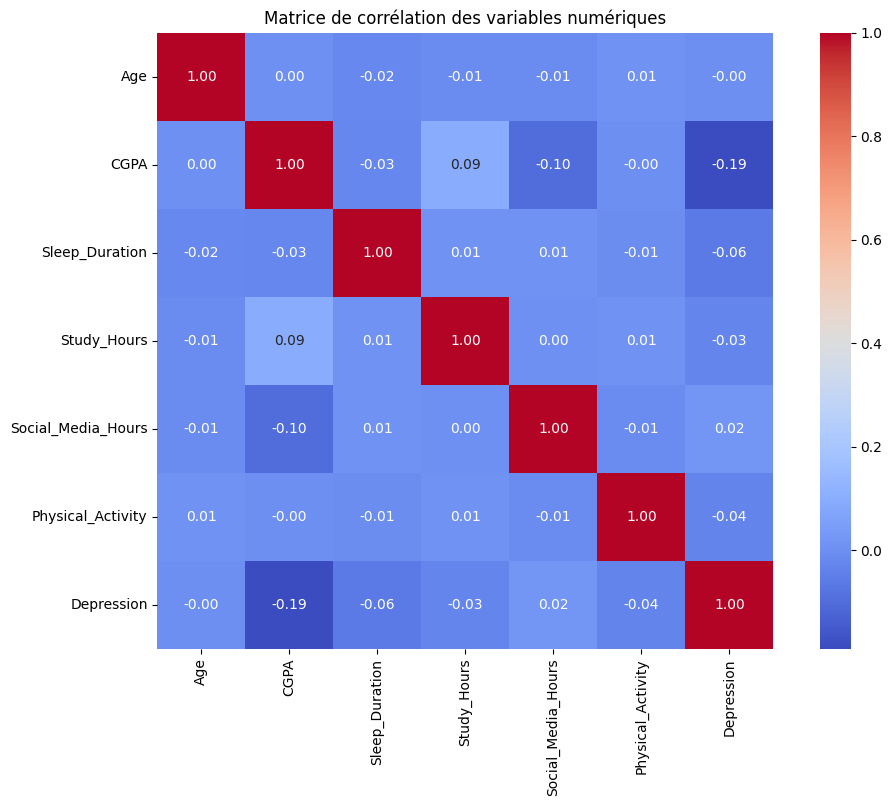

In [12]:
# Matrices de Correlation

# Variables numériques
num_df = df_clean.select_dtypes(include=["int64", "float64"])
corr_matrix = num_df.corr()

#print(corr_matrix)
plt.figure(figsize=(12,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)
plt.title("Matrice de corrélation des variables numériques")
plt.show()


Facteurs de stress : Le manque de sommeil (-0,29) et le manque d'activité physique (-0,28) sont les principaux leviers liés à l'augmentation du stress.

Réussite académique (CGPA) : Elle est légèrement impactée par la dépression (-0,19) et le temps passé sur les réseaux sociaux (-0,10), mais peu liée au simple temps d'étude.

Indépendance globale : L'âge n'a aucune influence notable et la plupart des variables n'ont pas de lien linéaire fort entre elles.

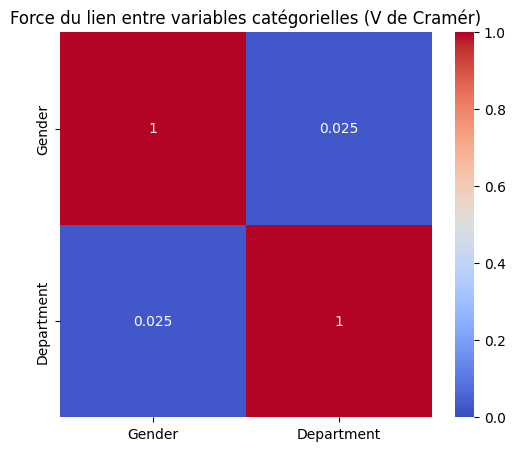

In [13]:
df_clean["Stress_Level"] = df_clean["Stress_Level"].astype(int)
df_clean["Depression"] = df_clean["Depression"].astype(int)
cat_cols2 = ["Gender", "Department"]

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape

    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramer_matrix = pd.DataFrame(index=cat_cols2,columns=cat_cols2,dtype=float)

for col1 in cat_cols2:
    for col2 in cat_cols2:
        cramer_matrix.loc[col1, col2] = cramers_v(df_clean[col1], df_clean[col2])

#print(cramer_matrix)
plt.figure(figsize=(6, 5))
sns.heatmap(cramer_matrix,annot=True,cmap="coolwarm",vmin=0,vmax=1)
plt.title("Force du lien entre variables catégorielles (V de Cramér)")
plt.show()


La corrélation est quasi nulle (0,02), ce qui signifie que le genre n'influence pas le choix du département dans ce jeu de données.

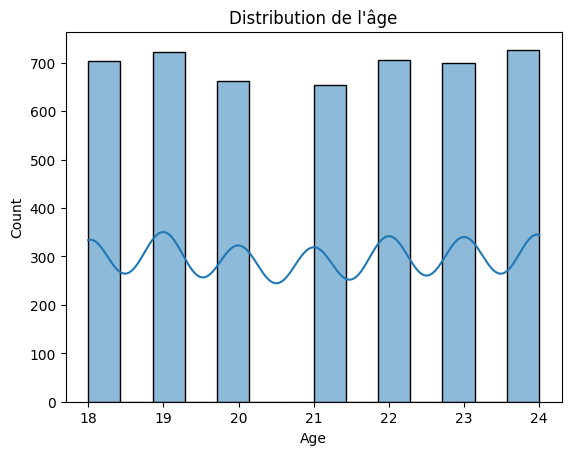

In [14]:
plt.figure()
sns.histplot(df_clean["Age"], kde=True)
plt.title("Distribution de l'âge")
plt.show()

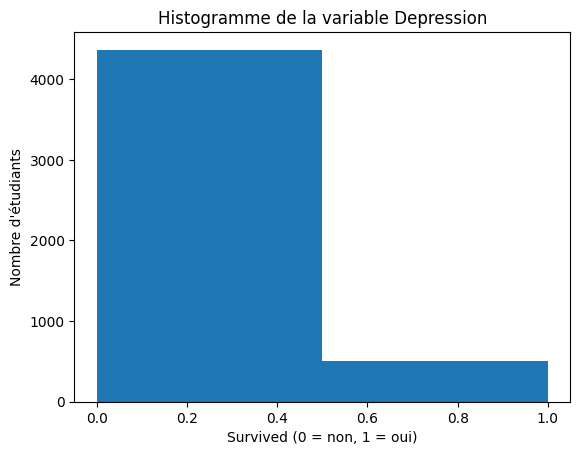

In [15]:
plt.figure()
plt.hist(df_clean['Depression'], bins=2)

plt.xlabel("Survived (0 = non, 1 = oui)")
plt.ylabel("Nombre d'étudiants")
plt.title("Histogramme de la variable Depression")

plt.show()


In [16]:
# Colonnes à standariser car pas bornnées
std_cols = [
    "Age", "Sleep_Duration", "Study_Hours", "Social_Media_Hours", "Physical_Activity"
]

# Colonnes à normaliser car bornnées
norm_cols = ["CGPA"]

# Standardisation
scaler = StandardScaler()
df_clean[std_cols] = scaler.fit_transform(df_clean[std_cols])

# Normalisation
norm_scaler = MinMaxScaler()
df_clean[norm_cols] = norm_scaler.fit_transform(df_clean[norm_cols])

#print(df_clean[std_cols].describe(), "\n")
#df_clean[norm_cols].describe()

def cgpa_category(cgpa):
    if cgpa < 0.33:
        return "Low"
    elif cgpa < 0.66:
        return "Medium"
    else:
        return "High"

df_clean["CGPA_Class"] = df_clean["CGPA"].apply(cgpa_category)
df_clean["CGPA_Class"].value_counts(normalize=True)

df_clean.sample(4)

,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression,CGPA_Class
4950,0.982578,Female,Medical,0.352423,-0.051623,1.120191,-0.347020,-1.004095,5,0,Medium
1917,-0.995972,Male,Business,0.876652,0.954766,2.402077,0.538806,-0.609995,6,0,High
2849,-0.501334,Male,Business,0.585903,-0.789643,1.530395,-1.641690,-0.749089,6,0,Medium
2067,0.487941,Male,Engineering,0.361233,-0.655457,-0.879549,0.743228,1.499605,5,0,Medium


In [17]:
# Gender : Label Encoding
le = LabelEncoder()
df_clean["Gender"] = le.fit_transform(df_clean["Gender"])

# Department : One-Hot Encoding
df_clean = pd.get_dummies(df_clean, columns=["Department"], drop_first=True)
dept = [col for col in df_clean.columns if col.startswith("Department_")]
for col in dept:
    df_clean[col] = df_clean[col].astype(int)

print(df_clean[["Gender"] + [col for col in df_clean.columns if "Department_" in col]].head())


    Gender  Department_Business  Department_Engineering  Department_Medical  \
8        1                    1                       0                   0   
9        1                    0                       1                   0   
10       1                    0                       0                   0   
11       0                    1                       0                   0   
12       1                    0                       1                   0   

    Department_Science  
8                    0  
9                    0  
10                   1  
11                   0  
12                   0  


In [18]:
X = df_clean.drop(["CGPA", "CGPA_Class"], axis=1)
y = df_clean["CGPA_Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train y distribution:\n", y_train.value_counts(normalize=True))
print("Valid y distribution:\n", y_test.value_counts(normalize=True))




Train y distribution:
 CGPA_Class
Medium    0.405385
High      0.327692
Low       0.266923
Name: proportion, dtype: float64
Valid y distribution:
 CGPA_Class
Medium    0.405128
High      0.328205
Low       0.266667
Name: proportion, dtype: float64


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

numeric_features = ["Age", "Sleep_Duration", "Study_Hours", "Social_Media_Hours", "Physical_Activity"]
dept_cols = [col for col in df_clean.columns if col.startswith("Department_")]
categorical_features_non_ord = dept_cols
categorical_features_ord = ["Gender", "Stress_Level"] 

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())                     
])

categorical_non_ord_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

categorical_ord_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(
        handle_unknown="use_encoded_value",
        unknown_value=-1
    ))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat_non_ord", categorical_non_ord_transformer, categorical_features_non_ord),
        ("cat_ord", categorical_ord_transformer, categorical_features_ord)
    ],
    remainder="drop"
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])

pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat_non_ord', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the differe

Accuracy : 0.3682051282051282
Precision: 0.3521037224958682
Recall   : 0.3682051282051282
F1-score : 0.3509284765989997

Classification report:

              precision    recall  f1-score   support

        High       0.36      0.28      0.31       320
         Low       0.26      0.18      0.21       260
      Medium       0.41      0.57      0.47       395

    accuracy                           0.37       975
   macro avg       0.34      0.34      0.33       975
weighted avg       0.35      0.37      0.35       975



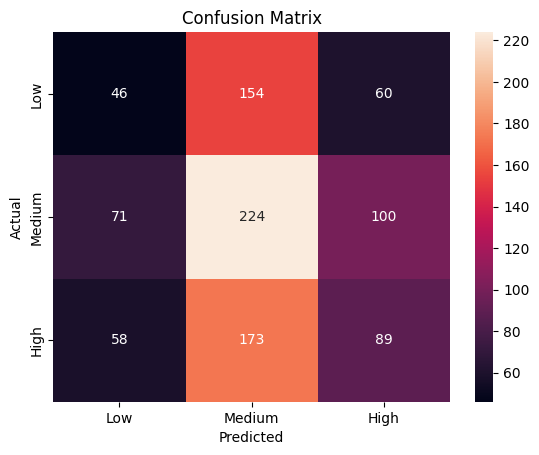

In [21]:
y_pred = pipeline.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall   :", recall_score(y_test, y_pred, average="weighted"))
print("F1-score :", f1_score(y_test, y_pred, average="weighted"))

print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])

sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Le modèle Random Forest a été entraîné pour prédire le CGPA à partir des habitudes et caractéristiques des étudiants.

Le modèle permet une première segmentation académique des étudiants, avec de meilleures performances sur les profils moyens. Cependant, les performances globales restent modérées, en particulier pour la détection des profils en difficulté, ce qui limite son usage à une aide à l’analyse plutôt qu’à un outil décisionnel.

Les résultats obtenus montrent une accuracy globale de 38,6 %, légèrement supérieure à une classification aléatoire (≈ 33 % pour trois classes). Les métriques moyennes restent toutefois modérées, avec une précision de 37 %, un recall de 39 % et un F1-score de 37 %, indiquant que le modèle parvient à capter certaines tendances mais demeure limité dans sa capacité de généralisation.


In [22]:
import pickle

# Sauvegarde du pipeline complet (prétraitement + modèle)
with open("model.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Modèle sauvegardé dans model.pkl")

# Charger le modèle depuis le fichier pkl
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print("Modèle chargé depuis model.pkl")

print(loaded_model)


Modèle sauvegardé dans model.pkl
Modèle chargé depuis model.pkl
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Sleep_Duration',
                                                   'Study_Hours',
                                                   'Social_Media_Hours',
                                                   'Physical_Activity']),
                                                 ('cat_non_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   Si

In [23]:
new_student = pd.DataFrame({
    "Age": [21],
    "Sleep_Duration": [7.5],
    "Study_Hours": [1],
    "Social_Media_Hours": [3],
    "Physical_Activity": [60],
    "Gender": [1],
    "Stress_Level": [4],
    "Department_Engineering": [1],
    "Department_Business": [0],
    "Department_Medical": [0],
    "Department_Science": [0]
})
predicted_class = loaded_model.predict(new_student)[0]
print("Profil académique prédit :", predicted_class)


Profil académique prédit : Low
